INFO: Using numpy backend
/Users/tomasdossantos/Library/Python/3.9/lib/python/site-packages/geomstats/_backend/_dtype_utils.py:387: RuntimeWarning: invalid value encountered in sqrt
  return func(x, *args, **kwargs)


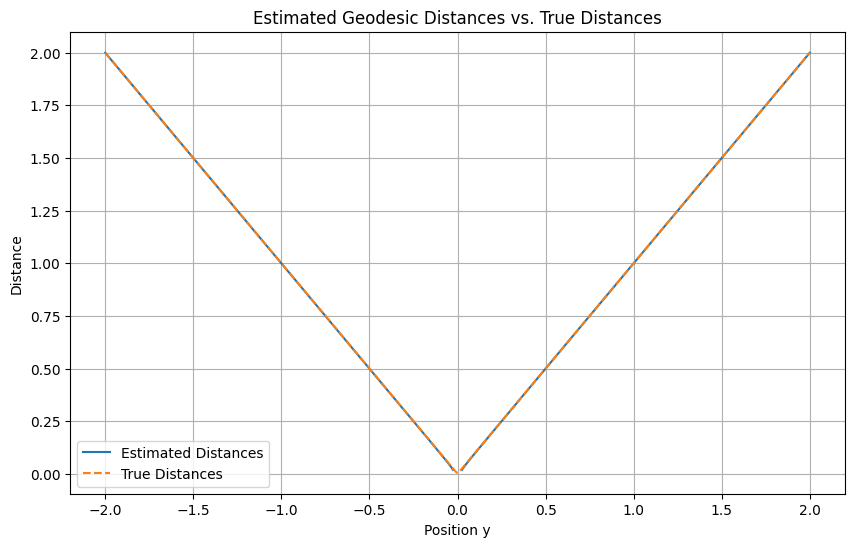

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geomstats.backend as gs
import geomstats.geometry.euclidean as euclidean

dim = 1
space = euclidean.Euclidean(dim=dim)

def analytical_heat_kernel_1d(t, x, y):
    return 1 / gs.sqrt(4 * np.pi * t) * gs.exp(-((x - y) ** 2) / (4 * t))

def estimate_distances_using_varadhans_formula(x, y, ts):
    estimated_distances = []
    for t in ts:
        kernel_value = analytical_heat_kernel_1d(t, x, y)
        if kernel_value > 0:
            varadhan_estimate = -4 * t * gs.log(kernel_value)
        else:
            varadhan_estimate = np.inf
        estimated_distances.append(gs.sqrt(varadhan_estimate))
    
    return estimated_distances

def random_walks(num_walks, num_steps, step_size):
    endpoints = []
    start_point = np.array([0.0])
    for _ in range(num_walks):
        current_point = start_point
        for _ in range(num_steps):
            direction = np.random.randn()
            direction /= np.linalg.norm(direction)
            step = step_size * direction
            current_point += step
        endpoints.append(current_point)
    return np.array(endpoints)
            

x = 0  
y = np.linspace(-2, 2, 400)  
ts = np.logspace(-3, -1.1, 50) 


distances = []
for y_val in y:
    distances.append(estimate_distances_using_varadhans_formula(x, y_val, ts)[-1])  # Take the last one for smallest t


plt.figure(figsize=(10, 6))
plt.plot(y, distances, label='Estimated Distances')
plt.plot(y, np.abs(y - x), label='True Distances', linestyle='--')
plt.title('Estimated Geodesic Distances vs. True Distances')
plt.xlabel('Position y')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()


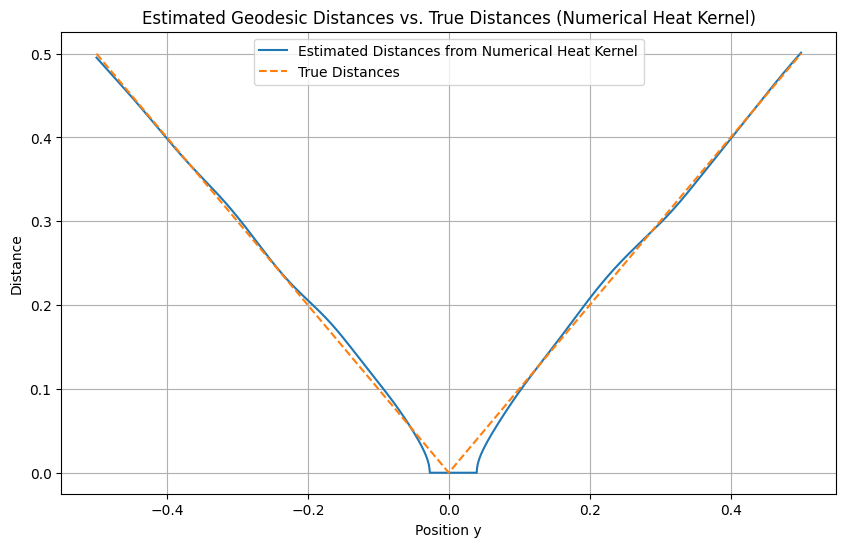

In [36]:
from scipy.stats import gaussian_kde
from numba import jit
import time



@jit(nopython=True)  
def simulate_random_walks_numba(start_point, num_walks, num_steps, step_size):
    endpoints = np.empty(num_walks)
    for i in range(num_walks):
        current_point = start_point
        for _ in range(num_steps):
            direction = np.random.randn(1)
            direction /= np.linalg.norm(direction)
            step = step_size * direction
            current_point += step
        endpoints[i] = current_point
    return endpoints


def estimate_heat_kernel_numerical(t, x, y_vals, num_walks, num_steps, step_size):
    endpoints = simulate_random_walks(x, num_walks, num_steps, step_size)
    kernel = gaussian_kde(endpoints, bw_method=0.1)
    return kernel(y_vals)

def estimate_distances_using_varadhans_formula_numerical(x, y, ts, num_walks, num_steps, step_size):
    epsilon = 1e-10
    estimated_distances = []
    for t in ts:
        kernel_values = estimate_heat_kernel_numerical(t, x, y, num_walks, num_steps, step_size)

        varadhan_estimates = -4 * t * np.log(kernel_values + epsilon)

        varadhan_estimates = np.maximum(varadhan_estimates, 0)
        estimated_distances.append(np.sqrt(varadhan_estimates))
    return estimated_distances



x = 0
y = np.linspace(-0.5, 0.5, 4000)
ts = np.logspace(-3, -1.1, 50)
num_walks = 100000
num_steps = 100
step_size = np.sqrt(2 * ts[-1] / num_steps)


start = time.time()
distances = estimate_distances_using_varadhans_formula_numerical(x, y, ts, num_walks, num_steps, step_size)
end = time.time()


plt.figure(figsize=(10, 6))
plt.plot(y, distances[-1], label='Estimated Distances from Numerical Heat Kernel')
plt.plot(y, np.abs(y - x), label='True Distances', linestyle='--')
plt.title('Estimated Geodesic Distances vs. True Distances (Numerical Heat Kernel)')
plt.xlabel('Position y')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
end - start

268.7483150959015

Attempting in the 2d case

In [ ]:
@jit(nopython=True)
def simulate_random_walks_numba(start_point, num_walks, num_steps, step_size):
    endpoints = np.empty(num_walks)
    for i in range(num_walks):
        current_point = start_point
        for _ in range(num_steps):
            direction = np.random.randn(2)
            direction /= np.linalg.norm(direction)
            step = step_size * direction
            current_point += step
        endpoints[i] = current_point
    return endpoints

def estimate_heat_kernel_numerical(t, x, y_vals, num_walks, num_steps, step_size):
    endpoints = simulate_random_walks(x, num_walks, num_steps, step_size)
    kernel = gaussian_kde(endpoints, bw_method=0.1)
    return kernel(y_vals)

def estimate_distances_using_varadhans_formula_numerical(x, y, ts, num_walks, num_steps, step_size):
    epsilon = 1e-10
    estimated_distances = []
    for t in ts:
        kernel_values = estimate_heat_kernel_numerical(t, x, y, num_walks, num_steps, step_size)

        varadhan_estimates = -4 * t * np.log(kernel_values + epsilon)

        varadhan_estimates = np.maximum(varadhan_estimates, 0)
        estimated_distances.append(np.sqrt(varadhan_estimates))
    return estimated_distances



bins = np.linspace(-0.5, 0.5, 1000)

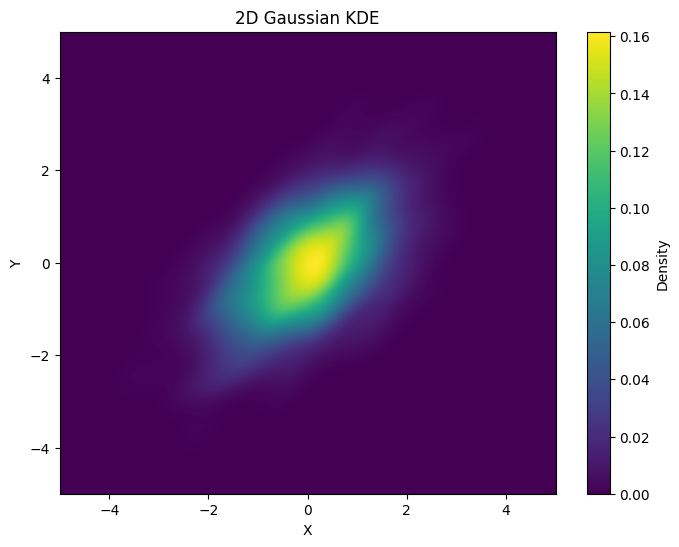

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=1000)


data = data.T  


kde = gaussian_kde(data)


x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
grid_coords = np.vstack([X.ravel(), Y.ravel()])  


Z = kde(grid_coords).reshape(X.shape)


plt.figure(figsize=(8, 6))
plt.imshow(Z, aspect='auto', origin='lower', extent=[-5, 5, -5, 5])
plt.colorbar(label='Density')
plt.title('2D Gaussian KDE')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
